In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
!curl -O  https://lazyprogrammer.me/course_files/airline_passengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2036  100  2036    0     0   1481      0  0:00:01  0:00:01 --:--:--  1483
100  2036  100  2036    0     0   1480      0  0:00:01  0:00:01 --:--:--  1482


In [4]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [5]:
df['LogPassengers']=np.log(df['Passengers'])

In [6]:
Ntest=12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [7]:
# boolean series to index df rows
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

In [8]:
df['DiffLogPassengers']=df['LogPassengers'].diff()

In [9]:
# Make supervised dataset
series=df['DiffLogPassengers'].dropna().to_numpy()

T=10
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print('X.shape',X.shape,'Y.shape',Y.shape)

X.shape (133, 10) Y.shape (133,)


In [10]:
Xtrain,Ytrain=X[:-Ntest],Y[:-Ntest]
Xtest,Ytest=X[-Ntest:],Y[-Ntest:]

In [11]:
# Basic ANN
i=Input(shape=(T,))
x=Dense(32,activation='relu')(i) # I have chose an arbitrary size of 32 for hidden layer. 
x=Dense(1)(x)
model=Model(i,x)

In [12]:
model.compile(
loss='mse',
optimizer='adam',
metrics='mae',)

In [13]:
r=model.fit(
Xtrain,
Ytrain,
epochs=100,
validation_data=(Xtest,Ytest)
)

Epoch 1/100
4/4 [==============================] - 2s 119ms/step - loss: 0.0114 - mae: 0.0801 - val_loss: 0.0119 - val_mae: 0.0879
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0104 - mae: 0.0763 - val_loss: 0.0110 - val_mae: 0.0843
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0094 - mae: 0.0738 - val_loss: 0.0102 - val_mae: 0.0808
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0088 - mae: 0.0720 - val_loss: 0.0094 - val_mae: 0.0775
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0080 - mae: 0.0691 - val_loss: 0.0088 - val_mae: 0.0749
Epoch 6/100
4/4 [==============================] - 0s 28ms/step - loss: 0.0075 - mae: 0.0663 - val_loss: 0.0082 - val_mae: 0.0722
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0069 - mae: 0.0640 - val_loss: 0.0077 - val_mae: 0.0696
Epoch 8/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0064 - mae: 0.0

4/4 [==============================] - 0s 20ms/step - loss: 0.0011 - mae: 0.0263 - val_loss: 0.0022 - val_mae: 0.0407
Epoch 64/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0022 - val_mae: 0.0407
Epoch 65/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0022 - val_mae: 0.0406
Epoch 66/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0022 - val_mae: 0.0405
Epoch 67/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0011 - mae: 0.0258 - val_loss: 0.0022 - val_mae: 0.0406
Epoch 68/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0011 - mae: 0.0257 - val_loss: 0.0022 - val_mae: 0.0407
Epoch 69/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0022 - val_mae: 0.0405
Epoch 70/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0010 - mae: 0.0256 - 

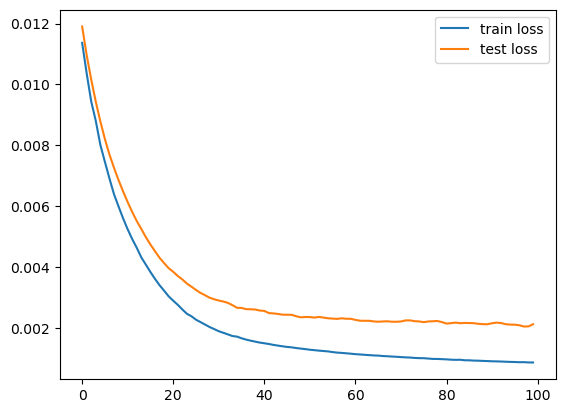

In [14]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

In [15]:
train_idx[:T+1]=False # first T+1 values are not predictable

In [16]:
Ptrain=model.predict(Xtrain).flatten()
Ptest=model.predict(Xtest).flatten()

1/1 [==============================] - 0s 47ms/step


In [17]:
# store diff predictions
df.loc[train_idx,'Diff ANN Train Prediction']=Ptrain
df.loc[test_idx,'Diff ANN Test Prediction']=Ptest

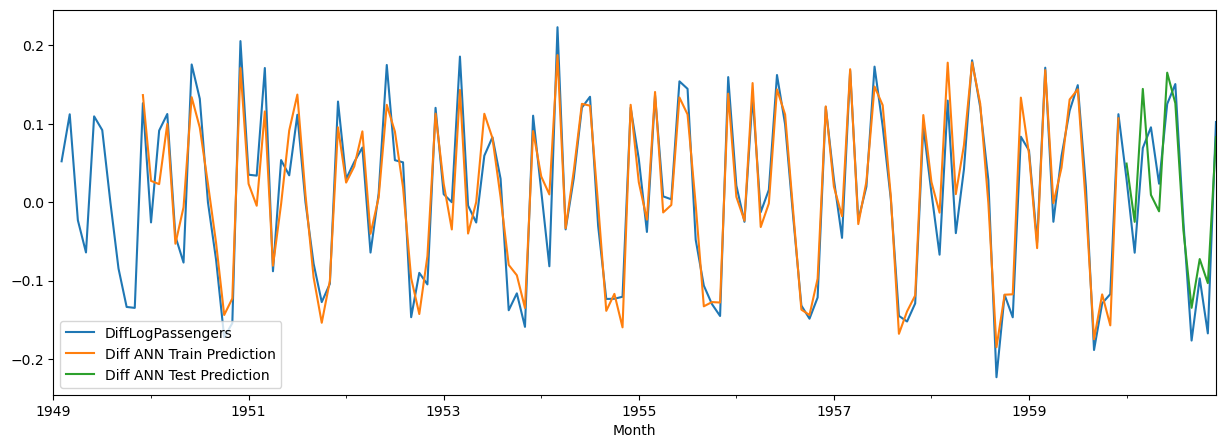

In [18]:
cols=['DiffLogPassengers',
     'Diff ANN Train Prediction',
     'Diff ANN Test Prediction']
df[cols].plot(figsize=(15,5));

In [19]:
# needed to compute un-differenced predictions
df['ShiftLogPassengers']=df['LogPassengers'].shift(1)
prev=df['ShiftLogPassengers']

In [20]:
# Last-known train value
last_train=train.iloc[-1]['LogPassengers']

In [21]:
# 1-step forecast
df.loc[train_idx,'1step_train']=prev[train_idx]+Ptrain
df.loc[test_idx,'1step_test']=prev[test_idx]+Ptest

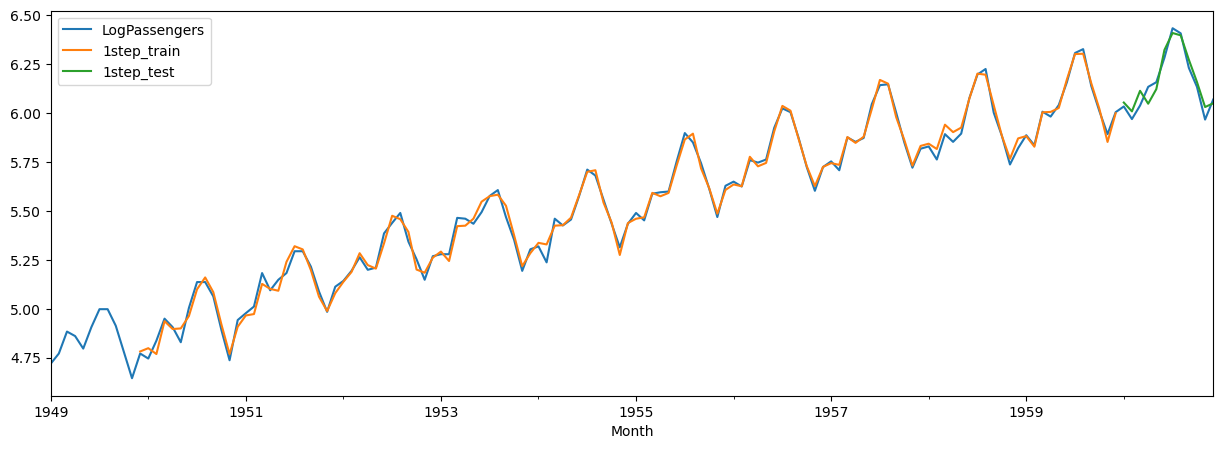

In [22]:
# plot 1-step forecast
df[['LogPassengers','1step_train','1step_test']].plot(figsize=(15,5));

In [23]:
# multi-step forecast
multistep_predictions=[]

# first test input
last_x=Xtest[0]

while len(multistep_predictions)<Ntest:
    p=model.predict(last_x.reshape(1,-1))[0]
    
    # update the predictions list
    multistep_predictions.append(p)

    # Make the new input
    last_x=np.roll(last_x,-1)
    last_x[-1]=p

1/1 [==============================] - 0s 32ms/step


In [24]:
# save multi-step forecast to dataframe
df.loc[test_idx,'multistep']=last_train+np.cumsum(multistep_predictions)

<Axes: xlabel='Month'>

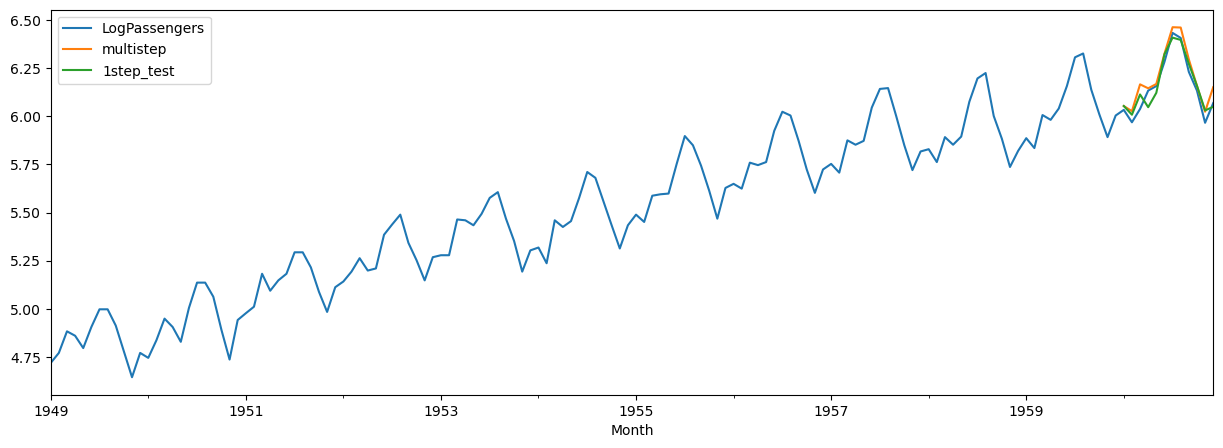

In [25]:
# plot 1-step and multi-step forecast
df[['LogPassengers','multistep','1step_test']].plot(figsize=(15,5))

In [26]:
# make multi-output supervised dataset
Tx=T
Ty=Ntest
X=[]
Y=[]
for t in range(len(series)-Tx-Ty+1):
    x=series[t:t+Tx]
    X.append(x)
    y=series[t+Tx:t+Tx+Ty]
    Y.append(y)
    
X=np.array(X).reshape(-1,Tx)
Y=np.array(Y).reshape(-1,Ty)
N=len(X)
print('X.shape',X.shape,'Y.shape',Y.shape)

X.shape (122, 10) Y.shape (122, 12)


In [27]:
Xtrain_m,Ytrain_m=X[:-1],Y[:-1]
Xtest_m,Ytest_m=X[-1:],Y[-1:]

In [28]:
# Basic ANN
i=Input(shape=(Tx,))
x=Dense(32,activation='relu')(i)
x=Dense(Ty)(x)
model=Model(i,x)

In [29]:
model.compile(
loss='mse',
optimizer='adam',
)

In [30]:
r=model.fit(
Xtrain_m,
Ytrain_m,
epochs=100,
validation_data=(Xtest_m,Ytest_m)
)

Epoch 1/100
4/4 [==============================] - 1s 80ms/step - loss: 0.0148 - val_loss: 0.0092
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0138 - val_loss: 0.0091
Epoch 3/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0130 - val_loss: 0.0091
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0122 - val_loss: 0.0090
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0116 - val_loss: 0.0089
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0111 - val_loss: 0.0086
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0107 - val_loss: 0.0084
Epoch 8/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0102 - val_loss: 0.0080
Epoch 9/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0099 - val_loss: 0.0077
Epoch 10/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0095 - val_loss: 0.0074
Epoch 11/100
4/4 [=

Epoch 84/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 85/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 86/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 87/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 88/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 89/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 90/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 91/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 92/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 93/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 94/1

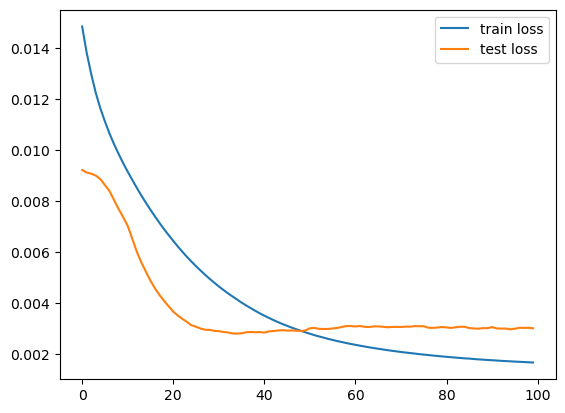

In [31]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

In [32]:
Ptrain=model.predict(Xtrain_m)
Ptest=model.predict(Xtest_m)

1/1 [==============================] - 0s 23ms/step


In [33]:
Ptrain.shape,Ptest.shape

((121, 12), (1, 12))

In [34]:
Ptrain=Ptrain[:,0]
Ptest=Ptest[0]

In [35]:
# save multi-output forecast to dataframe
df.loc[test_idx,'multioutput']=last_train+np.cumsum(Ptest)

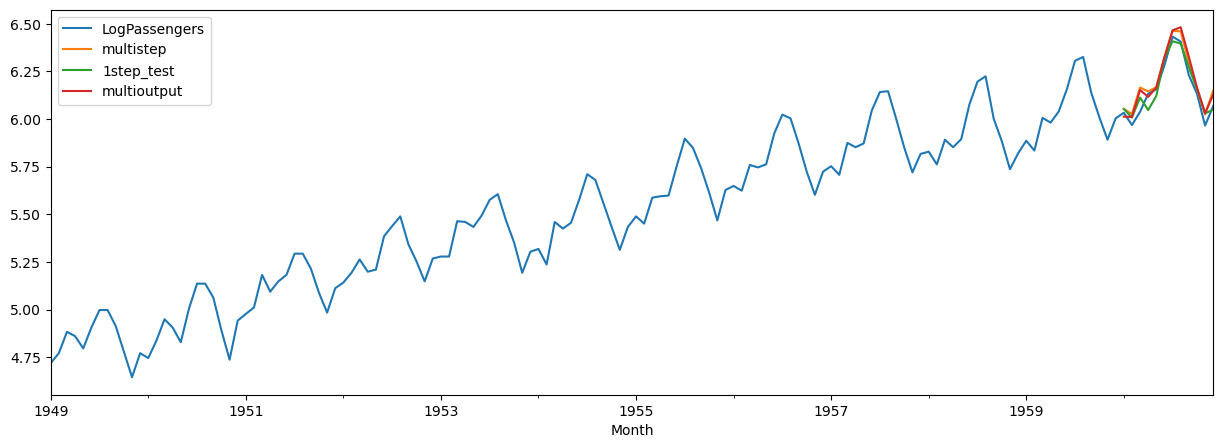

In [36]:
# plot all forecasts
cols=['LogPassengers','multistep','1step_test','multioutput']
df[cols].plot(figsize=(15,5));

In [39]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogPassengers']
mape1=mean_absolute_percentage_error(
test_log_pass,df.loc[test_idx,'multistep'])
print('multi-step MAPE:',mape1)
mape2=mean_absolute_percentage_error(
test_log_pass,df.loc[test_idx,'multioutput'])
print('multi-output MAPE:',mape2)

multi-step MAPE: 0.007946465664490176
multi-output MAPE: 0.008268444357838677
